In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('US-pumpkins.csv')

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()

C:\Users\pcset\AppData\Local\Temp\ipykernel_27028\3541252711.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


In [4]:
new_pumpkins.Month.unique()

array([ 9, 10, 11, 12,  8])

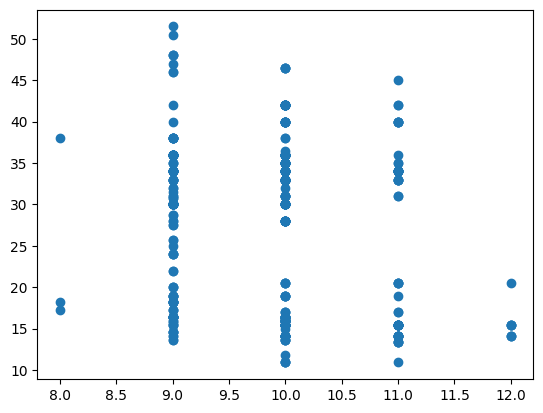

In [4]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

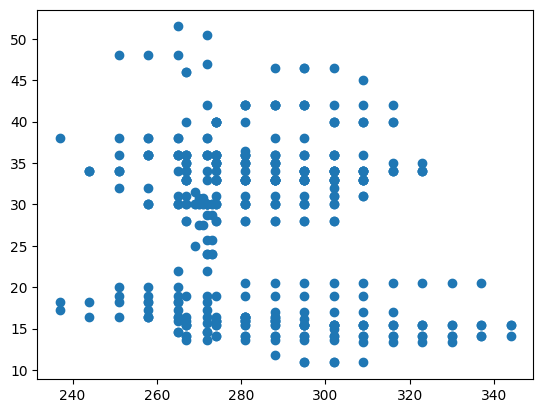

In [5]:
plt.scatter('DayOfYear','Price',data=new_pumpkins)

In [5]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077543
-0.16673322492745396


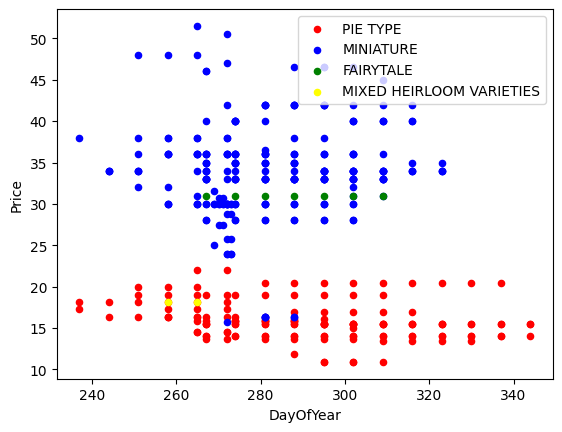

In [6]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<Axes: xlabel='Variety'>

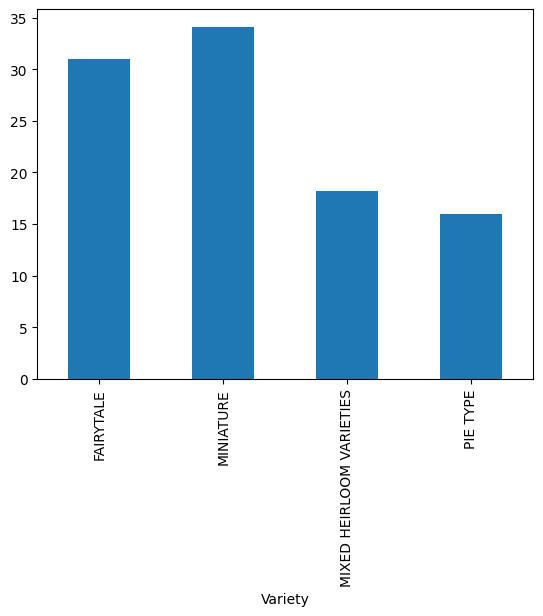

In [7]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

In [8]:
new_pumpkins.Variety.unique()

array(['PIE TYPE', 'MINIATURE', 'FAIRYTALE', 'MIXED HEIRLOOM VARIETIES'],
      dtype=object)

-0.26691922821973174


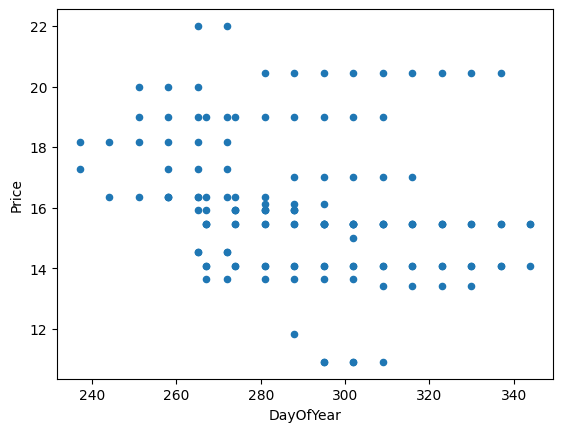

In [11]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price') 
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins.Price))
## Now with a stronger correlation it makes sense training a predictive model

In [17]:
## before training, remove missing values 
pie_pumpkins.dropna(inplace = True)
pie_pumpkins.info()
print("NA values: ", pie_pumpkins.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int32  
 1   DayOfYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 9.6+ KB
NA values:  0


C:\Users\pcset\AppData\Local\Temp\ipykernel_27028\3338369780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace = True)


In [19]:
from sklearn.linear_model import LinearRegression


In [20]:
from sklearn.metrics import mean_squared_error


In [21]:

from sklearn.model_selection import train_test_split

In [23]:
# Linear Regression expects a 2D array as input
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1) # -1 is a placeholder and you are asking to reshape into an array with 1 column and as many rows as necessary
y = pie_pumpkins['Price']

In [29]:
pie_pumpkins["DayOfYear"].to_numpy()

array([267, 267, 274, 274, 281, 281, 281, 281, 288, 288, 288, 295, 295,
       295, 302, 302, 302, 258, 265, 265, 265, 272, 272, 309, 316, 323,
       330, 267, 274, 281, 288, 295, 302, 309, 316, 323, 330, 337, 267,
       274, 281, 288, 295, 302, 309, 316, 323, 330, 337, 344, 265, 272,
       267, 267, 267, 274, 274, 274, 281, 281, 281, 288, 288, 288, 295,
       295, 295, 302, 302, 302, 309, 309, 309, 316, 316, 316, 323, 323,
       323, 330, 330, 337, 337, 344, 344, 237, 244, 244, 251, 251, 258,
       258, 265, 265, 272, 272, 281, 288, 295, 302, 309, 316, 323, 330,
       337, 272, 267, 274, 281, 288, 295, 302, 309, 265, 267, 274, 281,
       288, 295, 302, 309, 251, 258, 265, 272, 295, 302, 309, 251, 258,
       258, 265, 272, 288, 295, 302, 309, 316, 288, 295, 302, 237, 258,
       265], dtype=int64)

In [27]:
X

array([[267],
       [267],
       [274],
       [274],
       [281],
       [281],
       [281],
       [281],
       [288],
       [288],
       [288],
       [295],
       [295],
       [295],
       [302],
       [302],
       [302],
       [258],
       [265],
       [265],
       [265],
       [272],
       [272],
       [309],
       [316],
       [323],
       [330],
       [267],
       [274],
       [281],
       [288],
       [295],
       [302],
       [309],
       [316],
       [323],
       [330],
       [337],
       [267],
       [274],
       [281],
       [288],
       [295],
       [302],
       [309],
       [316],
       [323],
       [330],
       [337],
       [344],
       [265],
       [272],
       [267],
       [267],
       [267],
       [274],
       [274],
       [274],
       [281],
       [281],
       [281],
       [288],
       [288],
       [288],
       [295],
       [295],
       [295],
       [302],
       [302],
       [302],
       [309],
      

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [33]:
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)') 
## Our error seems to be around 2 points, which is ~17%. Not too good

Mean error: 2.77 (17.2%)


In [39]:
## This means that prices drop at about 2 cents a day
lin_reg.coef_

array([-0.01751876])

In [40]:
## 0 is bad and 1 is good,  In our case, the coefficient is around 0.06, which is quite low.
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.04460606335028361


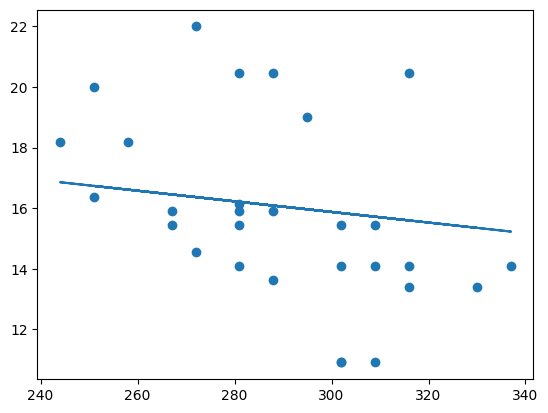

In [35]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [36]:
## Polynomial regression creates a curved line to better fit non-linear data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Scikit-learn includes a helpful pipeline API to combine different steps of data processing together. 
## A pipeline is a chain of estimators. In our case, we will create a pipeline that first adds polynomial features to our model, and then trains the regression:
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [43]:
pred2 = pipeline.predict(X_test)

mse2 = np.sqrt(mean_squared_error(y_test,pred2))
print(f'Mean error: {mse2:3.3} ({mse/np.mean(pred2)*100:3.3}%)') 

Mean error: 2.73 (17.3%)


In [44]:
score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.07639977655280128


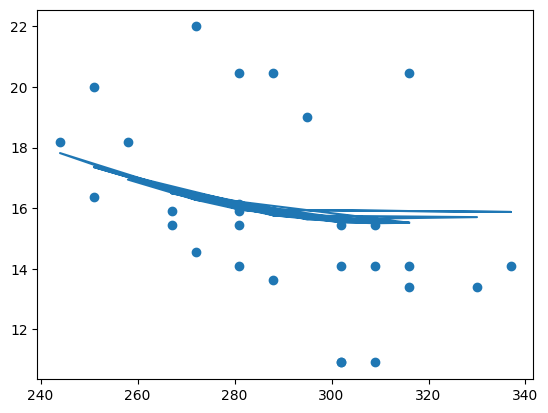

In [47]:
## As we can see with polinomial the model is more predictive
plt.scatter(X_test,y_test)
plt.plot(X_test,pred2)

In [46]:
# regression works with numbers so let's get dummy variables for variety 
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [48]:
## Let's make the best model possible, combining more data in X
# set up training data
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.27%)
Model determination:  0.9637305954239013


## Practice Problem

In [50]:
from sklearn import datasets

In [56]:
california_housing = datasets.fetch_california_housing()
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [61]:
housing = pd.DataFrame(california_housing.data, columns = california_housing.feature_names)
housing['MedHouseVal'] = california_housing.target

In [62]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Step 1. Clean Data

In [63]:
housing.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [64]:
## It's a perfect dataset, all numeric values and no NaN

### Step 2. Train Data

In [69]:
X = housing.drop('MedHouseVal', axis=1)
y = housing.MedHouseVal

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

### Step 3. Test Data

In [81]:
from sklearn.metrics import mean_squared_error, r2_score

pred = lin_reg.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean error: 0.738 (35.9%)
Model determination:  0.6112625421462152
R-squared: 0.6469096540341936


C:\Users\pcset\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\pcset\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [78]:
from sklearn.linear_model import LinearRegression

# Assuming X_train and X_test have multiple features
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)


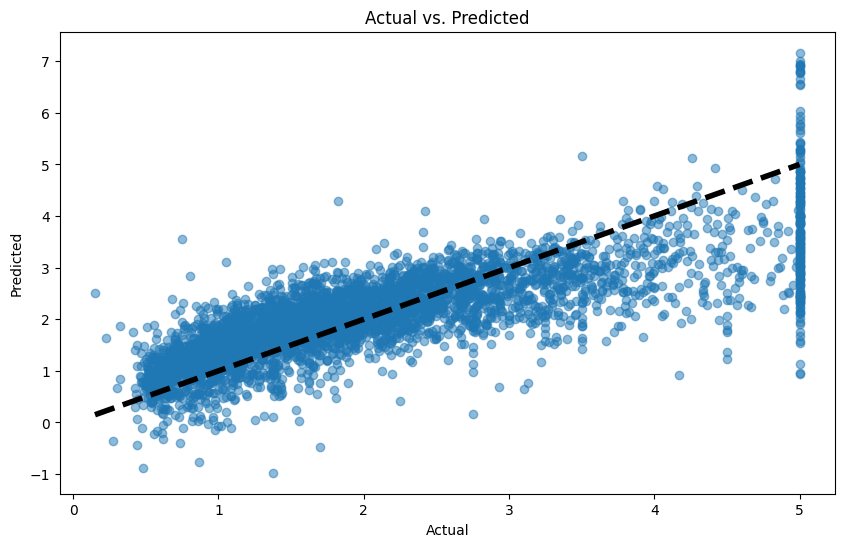

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.5)  # Plot actual vs. predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # A diagonal line where actual = predicted
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2, random_state=42)

# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=1.0))
])

# Fit the model
pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
score = pipe.score(X_train,y_train)


print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print('Model determination: ', score)

Mean Squared Error: 0.46269275948377797
R-squared: 0.6469096540341936
Model determination:  0.6852647946715122


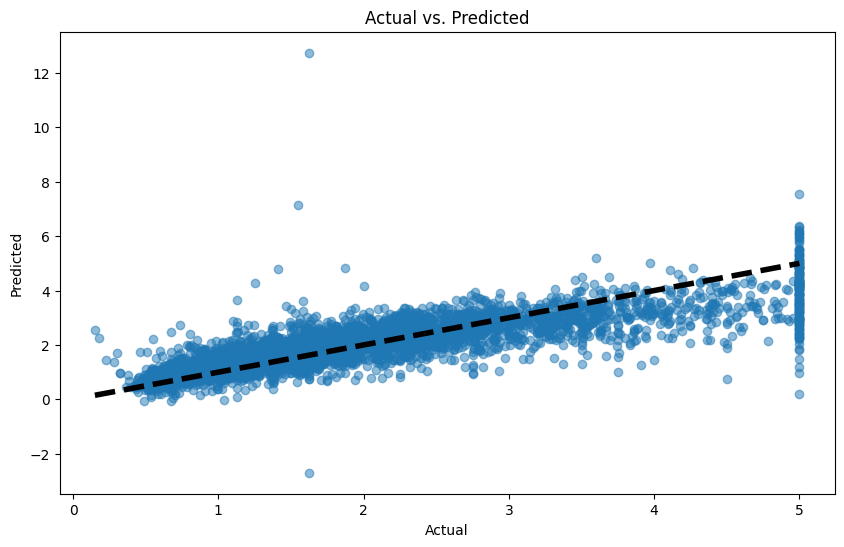

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # A diagonal line where actual = predicted
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()